In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler

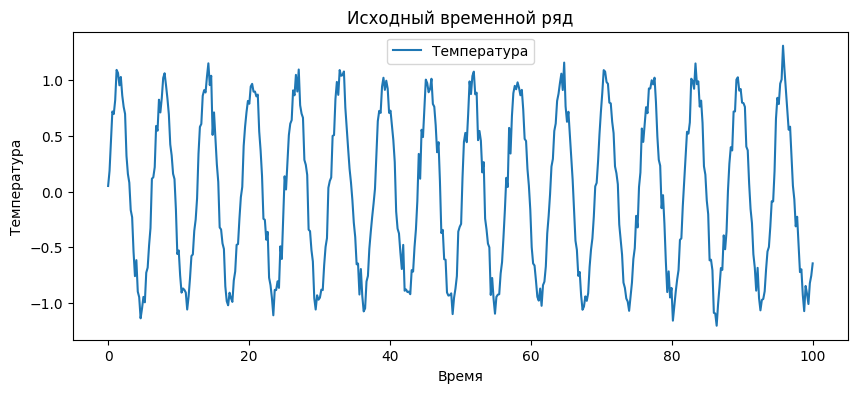

Epoch 1/20


c:\Users\chapa\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.1468 - val_loss: 0.0252
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0207 - val_loss: 0.0078
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0068 - val_loss: 0.0038
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0032 - val_loss: 0.0029
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 - val_loss: 0.0027
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 - val_loss: 0.002

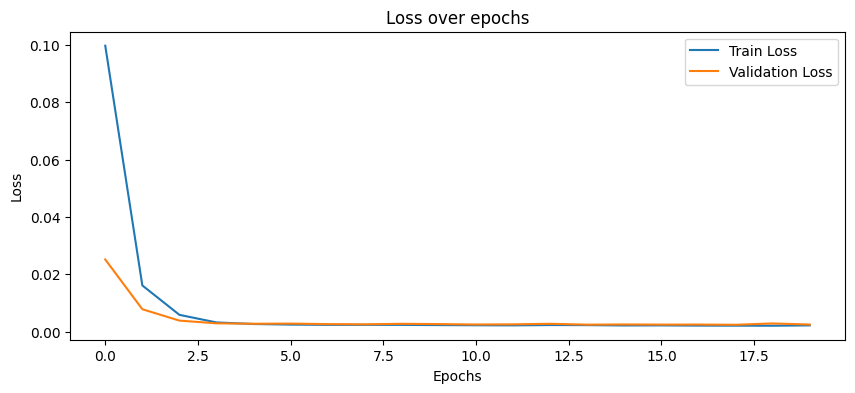

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


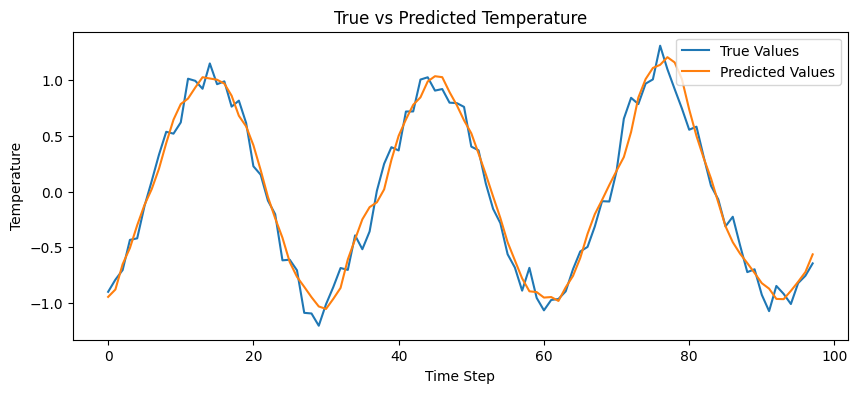

In [7]:
# 1. Генерация данных временного ряда
np.random.seed(42)
time_steps = 500
x = np.linspace(0, 100, time_steps)
temperature = np.sin(x) + np.random.normal(scale=0.1, size=time_steps)  # Синусоидальный тренд + шум

# Визуализация данных
plt.figure(figsize=(10, 4))
plt.plot(x, temperature, label="Температура")
plt.title("Исходный временной ряд")
plt.xlabel("Время")
plt.ylabel("Температура")
plt.legend()
plt.show()

# 2. Подготовка данных для обучения
scaler = MinMaxScaler(feature_range=(0, 1))
temperature_scaled = scaler.fit_transform(temperature.reshape(-1, 1))

def create_dataset(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x_seq = data[i:i + seq_length]
        y_next = data[i + seq_length]
        xs.append(x_seq)
        ys.append(y_next)
    return np.array(xs), np.array(ys)

seq_length = 10  # Длина входной последовательности
X, y = create_dataset(temperature_scaled, seq_length)

# Разделение на обучающую и тестовую выборки
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Изменение формы данных для RNN: [samples, time_steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 3. Создание модели RNN
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# 4. Обучение модели
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# 5. Оценка модели
loss = model.evaluate(X_test, y_test)
print(f"Loss on test set: {loss}")

# Визуализация потерь во время обучения
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 6. Прогнозирование
predictions = model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

# Визуализация прогнозов
plt.figure(figsize=(10, 4))
plt.plot(y_test_rescaled, label="True Values")
plt.plot(predictions_rescaled, label="Predicted Values")
plt.title("True vs Predicted Temperature")
plt.xlabel("Time Step")
plt.ylabel("Temperature")
plt.legend()
plt.show()